In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/heart_diceases.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [5]:
df["thal"].unique()

array([3, 2, 1, 0])

In [6]:
categorical_columns = ["sex", "fbs", "cp", "slope", "thal", "restecg", "exang", "ca"]

In [7]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
encoded = enc.fit_transform(df[categorical_columns])

In [8]:
encoded.toarray()

array([[0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]], shape=(1025, 25))

In [9]:
df[enc.get_feature_names_out()] = encoded.toarray()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,restecg_0,restecg_1,restecg_2,exang_0,exang_1,ca_0,ca_1,ca_2,ca_3,ca_4
0,52,1,0,125,212,0,1,168,0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,53,1,0,140,203,1,0,155,1,3.1,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,70,1,0,145,174,0,1,125,1,2.6,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,61,1,0,148,203,0,1,161,0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,62,0,0,138,294,1,1,106,0,1.9,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
df = df.drop(columns=categorical_columns)
df.corr()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,fbs_0,fbs_1,...,restecg_0,restecg_1,restecg_2,exang_0,exang_1,ca_0,ca_1,ca_2,ca_3,ca_4
age,1.000000,0.271121,0.219823,-0.390227,0.208137,-0.229324,0.103240,-0.103240,-0.121243,0.121243,...,0.158063,-0.175956,0.074802,-0.088163,0.088163,-0.354714,0.189677,0.218247,0.162754,-0.130087
trestbps,0.271121,1.000000,0.127977,-0.039264,0.187434,-0.138772,0.078974,-0.078974,-0.181767,0.181767,...,0.145613,-0.160461,0.062100,-0.061197,0.061197,-0.053888,-0.069120,0.095713,0.082236,0.019086
chol,0.219823,0.127977,1.000000,-0.021772,0.064880,-0.099966,0.198258,-0.198258,-0.026917,0.026917,...,0.167019,-0.178332,0.047423,-0.067382,0.067382,-0.085077,0.018573,0.061398,0.110765,-0.106299
thalach,-0.390227,-0.039264,-0.021772,1.000000,-0.349796,0.422895,0.049365,-0.049365,0.008866,-0.008866,...,-0.080033,0.108908,-0.120381,0.380281,-0.380281,0.273016,-0.202614,-0.044465,-0.181157,0.068462
oldpeak,0.208137,0.187434,0.064880,-0.349796,1.000000,-0.438441,-0.084687,0.084687,-0.010859,0.010859,...,0.096832,-0.140693,0.182811,-0.310844,0.310844,-0.206092,-0.013949,0.223046,0.188517,-0.109960
target,-0.229324,-0.138772,-0.099966,0.422895,-0.438441,1.000000,0.279501,-0.279501,0.041164,-0.041164,...,-0.160308,0.178573,-0.076357,0.438029,-0.438029,0.465981,-0.235299,-0.276566,-0.205720,0.085639
sex_0,0.103240,0.078974,0.198258,0.049365,-0.084687,0.279501,1.000000,-1.000000,0.027200,-0.027200,...,-0.030893,0.003595,0.113602,0.139157,-0.139157,0.119980,-0.101220,0.026489,-0.059255,-0.088441
sex_1,-0.103240,-0.078974,-0.198258,-0.049365,0.084687,-0.279501,-1.000000,1.000000,-0.027200,0.027200,...,0.030893,-0.003595,-0.113602,-0.139157,0.139157,-0.119980,0.101220,-0.026489,0.059255,0.088441
fbs_0,-0.121243,-0.181767,-0.026917,0.008866,-0.010859,0.041164,0.027200,-0.027200,1.000000,-1.000000,...,-0.097584,0.085279,0.051047,0.049261,-0.049261,0.117467,0.011455,-0.129926,-0.073210,-0.006528
fbs_1,0.121243,0.181767,0.026917,-0.008866,0.010859,-0.041164,-0.027200,0.027200,-1.000000,1.000000,...,0.097584,-0.085279,-0.051047,-0.049261,0.049261,-0.117467,-0.011455,0.129926,0.073210,0.006528


In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2,random_state=42)
len(train_data), len(test_data)

(820, 205)

In [15]:
X_train = train_data.drop(columns="target")
X_test = test_data.drop(columns="target")
y_train = train_data["target"]
y_test = test_data["target"]
X_train.shape, y_train.shape

((820, 30), (820,))

In [19]:
from sklearn.preprocessing import StandardScaler

std_scl = StandardScaler()
X_train = std_scl.fit_transform(X_train)
X_test = std_scl.transform(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty="l2", solver="sag", random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='sag')

In [38]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8829268292682927, 0.7902439024390244)

In [39]:
y_pred = model.predict(X_test)

In [40]:
from sklearn.metrics import precision_score, recall_score, \
    f1_score, confusion_matrix, roc_curve, roc_auc_score

print("Precision score:", precision_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))
print("F1-score score:", f1_score(y_test, y_pred))
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print("ROC curve:", roc_curve(y_test, y_pred))
print("ROC_AUC score:", roc_auc_score(y_test, y_pred))

Precision score: 0.7631578947368421
Recall score: 0.8446601941747572
F1-score score: 0.8018433179723502
Confusion matrix: [[75 27]
 [16 87]]
ROC curve: (array([0.        , 0.26470588, 1.        ]), array([0.        , 0.84466019, 1.        ]), array([inf,  1.,  0.]))
ROC_AUC score: 0.7899771559109081


In [41]:
import matplotlib.pyplot as plt

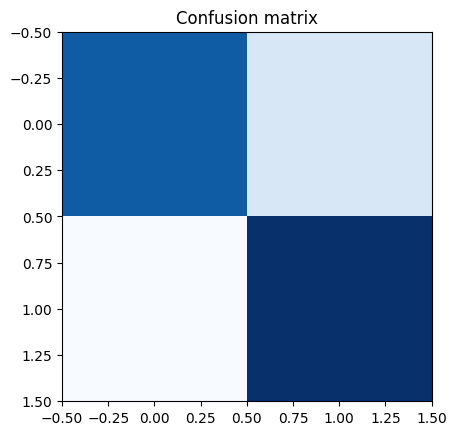

In [51]:
plt.imshow(confusion_matrix(y_test, y_pred), cmap="Blues")
plt.title("Confusion matrix")
plt.show()

In [65]:
from sklearn.feature_selection import RFE

rfe = RFE(model)
X_fitted = rfe.fit_transform(X_train, y_train)
X_test_fitted = rfe.transform(X_test)
X_fitted.shape, X_train.shape

((820, 15), (820, 30))

In [66]:
model.fit(X_fitted, y_train)

LogisticRegression(random_state=42, solver='sag')

In [68]:
model.score(X_fitted, y_train), model.score(X_test_fitted, y_test)

(0.8865853658536585, 0.8)